In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib as Path
%matplotlib inline

In [24]:
XTZ = pd.read_csv('XTZ_USD_2020-03-23_2021-02-08-CoinDesk.csv', index_col = 'Date', parse_dates = True, infer_datetime_format =True)
LINK = pd.read_csv('LINK_USD_2020-03-23_2021-02-08-CoinDesk.csv', index_col = 'Date', parse_dates = True, infer_datetime_format =True)
BTC = pd.read_csv('BTC_USD_2020-02-09_2021-02-08-CoinDesk.csv', index_col = 'Date', parse_dates = True, infer_datetime_format =True)

In [25]:
XTZ.dropna(inplace = True)
LINK.dropna(inplace = True)
BTC.dropna(inplace = True)


XTZ.drop(columns = ['24h Open (USD)','24h High (USD)','24h Low (USD)'] , inplace = True)
LINK.drop(columns = ['24h Open (USD)','24h High (USD)','24h Low (USD)'] , inplace = True)
BTC.drop(columns = ['24h Open (USD)','24h High (USD)','24h Low (USD)'] , inplace = True)

BTC

,Currency,Closing Price (USD)
Date,,
2020-02-09,BTC,10132.706499
2020-02-10,BTC,9838.900016
2020-02-11,BTC,10236.635148
2020-02-12,BTC,10364.926288
2020-02-13,BTC,10218.099737
...,...,...
2021-02-04,BTC,37256.252111
2021-02-05,BTC,37851.596590
2021-02-06,BTC,40302.799793


In [27]:
combined = pd.concat([XTZ, LINK, BTC], axis = 'rows', join = 'inner')
combined = combined.pivot_table(values="Closing Price (USD)",index="Date", columns = "Currency")

<AxesSubplot:title={'center':'Closing Price (USD)'}, xlabel='Date'>

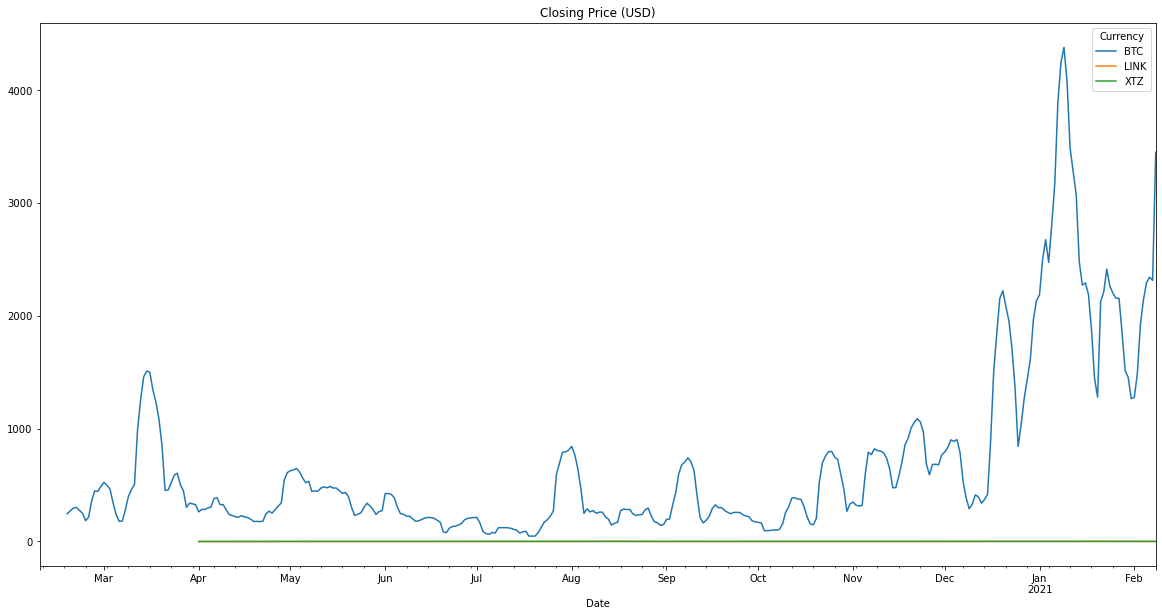

In [29]:
combined.rolling(window = 10).std().plot(figsize = (20,10),title = 'Closing Price (USD)')

In [30]:
combined.describe(include = 'all')

Currency,BTC,LINK,XTZ
count,366.000000,323.000000,323.000000
mean,13984.147513,10.073574,2.550478
std,8587.356569,5.762483,0.518716
min,4944.702336,2.025734,1.501323
25%,9190.914935,4.259920,2.161577
50%,10565.613567,10.564646,2.503671
75%,15481.382610,13.125738,2.850156
max,44716.685469,26.170589,4.331917


AttributeError: 'AxesSubplot' object has no attribute 'box'

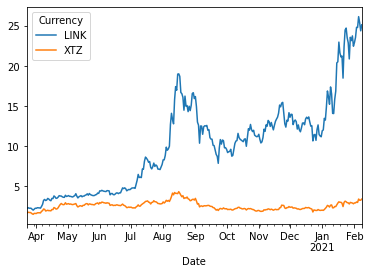

In [21]:
combined.plot().box()